In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report,r2_score,auc,roc_auc_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings

In [3]:
data_df = pd.read_csv('mobile_survey.csv')

In [4]:
data_df.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Mobile_Brand', 'Mobile_Since(mon/year)',
       'Liked_feature', 'New_mobile(mon/year)', 'Mode_of_Purchase',
       'Reason_for_current_mobile', 'Old_mobile_brand',
       'Accessories_purchased', 'Brand_suggestion_to_others',
       'Purchasing_same_brand_in_Future', 'Old_mobile_exchanged',
       'Reason_for_change', 'New_mobile', 'Mobile_Since', 'Age_Range'],
      dtype='object')

In [5]:
data_df.drop(['Name','Reason_for_change', 'New_mobile', 'Mobile_Since', 'Age_Range','Mobile_Since(mon/year)',
       'New_mobile(mon/year)'],axis=1,inplace=True)

In [6]:
obj_col=['Mobile_Brand',  'Liked_feature', 'Mode_of_Purchase',
       'Reason_for_current_mobile', 'Old_mobile_brand','Accessories_purchased','Brand_suggestion_to_others',
       'Purchasing_same_brand_in_Future', 'Old_mobile_exchanged']

In [7]:
data_df=pd.get_dummies(data=data_df,columns=obj_col)

In [8]:
data_df.shape

(47, 90)

In [9]:
data_df.head()

,Age,Sex,Rating,Mobile_price,Mobile_Brand_apple,Mobile_Brand_asus,Mobile_Brand_honor,Mobile_Brand_htc,Mobile_Brand_huawei,Mobile_Brand_lenovo,...,Accessories_purchased_powerbank,Accessories_purchased_screen guard,Accessories_purchased_tempered glass,Accessories_purchased_wireless headphones,Brand_suggestion_to_others_no,Brand_suggestion_to_others_yes,Purchasing_same_brand_in_Future_no,Purchasing_same_brand_in_Future_yes,Old_mobile_exchanged_no,Old_mobile_exchanged_yes
0,21,male,3.5,12000,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1
1,25,male,3.5,81000,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,22,male,4.0,11000,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3,28,male,4.0,15000,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
4,27,male,4.0,15000,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [10]:
#MinMaxScaler
xmms=data_df["Mobile_price"].values.reshape(-1,1)
mms = MinMaxScaler()
X_scaler=mms.fit_transform(xmms)
data_df["Mobile_price"] = X_scaler
warnings.filterwarnings("ignore")

In [11]:
#StandardScaler
'''xss=data_df["Mobile_price"].values.reshape(-1,1)
ss = StandardScaler()
S_scaler=ss.fit_transform(xss)
data_df["Mobile_price"] = S_scaler
warnings.filterwarnings("ignore")'''

'xss=data_df["Mobile_price"].values.reshape(-1,1)\nss = StandardScaler()\nS_scaler=ss.fit_transform(xss)\ndata_df["Mobile_price"] = S_scaler\nwarnings.filterwarnings("ignore")'

In [12]:
#Z_Score - To find outliers
z=np.abs(stats.zscore(data_df["Mobile_price"]))
threshold=3
print(np.where(z>3))
print(z)

(array([1], dtype=int64),)
[0.6902372  3.73180792 0.75432481 0.49797437 0.49797437 0.39925218
 0.01472651 0.56206198 1.10421589 0.56206198 0.39925218 0.56206198
 0.78636862 0.75432481 0.75432481 0.20698935 2.3859681  0.17753632
 0.17753632 0.49797437 0.78377784 0.49797437 0.36979915 0.91454384
 0.74150729 0.36979915 0.17753632 0.24162393 0.49797437 0.49797437
 2.3859681  0.81841242 0.39925218 0.49797437 2.06553005 0.6902372
 1.10421589 0.17753632 0.14290174 0.75432481 0.62614959 0.6902372
 0.6902372  0.17753632 0.33516457 1.745092   0.49797437]


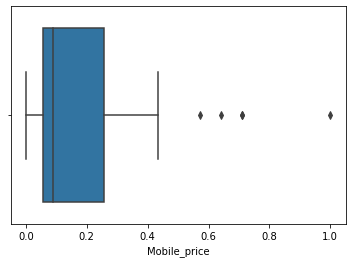

In [13]:
#BoxPLot for visualizing outliers
sns.boxplot(data_df["Mobile_price"])

In [14]:
#Removing Outliers - MinMaxScaler
data_df = data_df[data_df["Mobile_price"] < 0.3]

In [15]:
#Removing Outliers - StandardScaler
#data_df = data_df[data_df["Mobile_price"] < 0.75]

In [16]:
#Skewness - To check whether the attributes are normally distributed
'''
skewness = 0 : normally distributed.
skewness > 0 : more weight in the left tail of the distribution.
skewness < 0 : more weight in the right tail of the distribution
'''
data_df["Mobile_price"].skew()

0.9057745493474378

In [17]:
#MinMaxScaler for another attribute
rxmms=data_df["Rating"].values.reshape(-1,1)
mms = MinMaxScaler()
X_scalerr=mms.fit_transform(rxmms)
data_df["Rating"] = X_scalerr

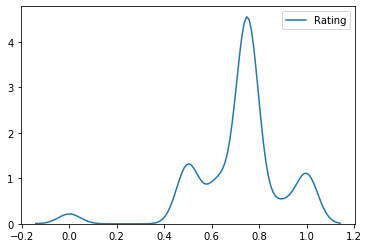

In [18]:
sns.kdeplot(data_df["Rating"])

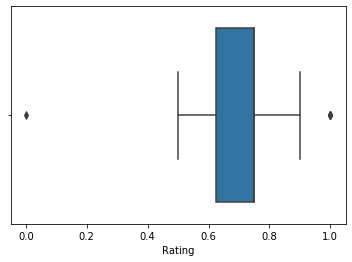

In [19]:
sns.boxplot(data_df["Rating"])

In [20]:
#To remove outliers - MinMaxScaler
data_df = data_df[data_df["Rating"]>0.4]

In [21]:
#Preparing DataSet for TrainTestSplit
x = data_df.drop(["Sex"],axis=1)
y=data_df["Sex"]

In [22]:
#TrainTestSplit
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [23]:
#To Check Dimension
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30, 89), (8, 89), (30,), (8,))

In [28]:
#HyperParameter Tuning - DecisionTree
#To Find best parameter to train the dataset and to increase the accuracy
'''param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              #"min_saples_split":randint(1,9),
              "criterion": ["gini", "entropy"]}'''

In [60]:
#Instantiating
#random = RandomizedSearchCV(dc,param_distributions=param_dist,n_iter=20,cv=5)

In [61]:
#Iterating the model with given parameter 
#random.fit(x_train,y_train)

In [62]:
#TO get best estimator for Algorithm Used
#random.best_estimator_

In [31]:
#XGBOOST
xg = XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
y_pi=xg.predict(x_test)
print(accuracy_score(y_pi,y_test))
print(confusion_matrix(y_pi,y_test))

0.625
[[0 0]
 [3 5]]


In [33]:
xg.get_booster().get_score(importance_type='gain')

{'Mobile_Brand_samsung': 2.3318059886363645,
 'Rating': 0.43152593364285713,
 'Liked_feature_user friendly': 2.3371516239999997,
 'Mobile_price': 0.32065592476576144,
 'Age': 0.2859526286428572,
 'Purchasing_same_brand_in_Future_no': 0.19614061346173917,
 'Mobile_Brand_redmi': 0.04795189698333333,
 'Liked_feature_camera': 0.7521117855555556,
 'Reason_for_current_mobile_internet': 0.21663621508562494,
 'Accessories_purchased_tempered glass': 0.12472213919999998,
 'Brand_suggestion_to_others_no': 0.15421187366666667,
 'Mode_of_Purchase_online': 0.185571432}

In [66]:
#DecisionTree
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
y_pred=dc.predict(x_test)

In [65]:
y_test

0       male
23      male
46    female
35    female
31      male
9       male
10      male
40    female
Name: Sex, dtype: object

In [68]:
y_pred

array(['male', 'male', 'male', 'male', 'male', 'male', 'female', 'male'],
      dtype=object)

In [37]:
#Metric Evaluation for Classification Problem
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.625
              precision    recall  f1-score   support

      female       0.00      0.00      0.00         0
        male       1.00      0.62      0.77         8

    accuracy                           0.62         8
   macro avg       0.50      0.31      0.38         8
weighted avg       1.00      0.62      0.77         8

[[0 0]
 [3 5]]


In [70]:
#LabelEncoder - If using Logistic Regression
le = LabelEncoder()
xer = le.fit_transform(data_df["Sex"])
data_df["Sex"]=xer

In [71]:
data_df.Sex.unique()

array([1, 0], dtype=int64)

In [72]:
#LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
Y_PRED = Lr.predict(x_test)

In [76]:
#For Our Understanding, use inverse_transform to read 
print(Y_PRED)
#print(le.inverse_transform(Y_PRED))

['male' 'male' 'male' 'male' 'male' 'male' 'male' 'male']


In [64]:
#NaiveBayes
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_p = gnb.predict(x_test)

In [ ]:
y_p

In [50]:
accuracy_score(y_p,y_test)

0.75

In [51]:
#SupportVectorMachine
svc = SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
accuracy_score(svc.predict(x_test),y_test)

0.625